In [1]:
import torchvision.transforms as transforms
from melanoma_dataset import MelanomaUnlabeledDataset, MelanomaLabeledDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
def batch_imshow(batch, labels=None, label_extractor=lambda x: x, rows=2, columns=2):
    transform_to_image = transforms.ToPILImage()
    fig = plt.figure(figsize=(7, 7))
    for i in range(0, columns * rows):
        item = batch[i]
        subplot = fig.add_subplot(rows, columns, i + 1)
        if labels is not None:
            img = transform_to_image(item)
            subplot.set_title("label: " + str(label_extractor(labels[i])))
        else:
            img = transform_to_image(item)
        plt.imshow(img)
    plt.show()

In [3]:
unlabeled_data = MelanomaUnlabeledDataset("./data/unlabeled", transform=transforms.ToTensor())
unlabeled_data_loader = DataLoader(unlabeled_data, batch_size=4, shuffle=False, pin_memory=True)
unlabeled_batch_sample = next(iter(unlabeled_data_loader))

Number of unlabeled images: 7018


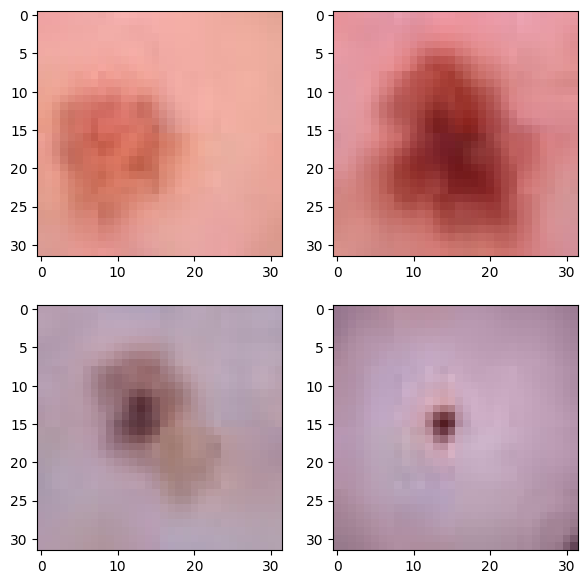

In [4]:
print("Number of unlabeled images: " + str(len(unlabeled_data)))
batch_imshow(unlabeled_batch_sample)

In [5]:
labeled_data = MelanomaLabeledDataset("./data/labeled", transform=transforms.ToTensor())
labeled_data_loader = DataLoader(labeled_data, batch_size=4, shuffle=False, pin_memory=True)
labeled_batch_sample, labels_for_batch = next(iter(labeled_data_loader))

Number of labeled images: 200


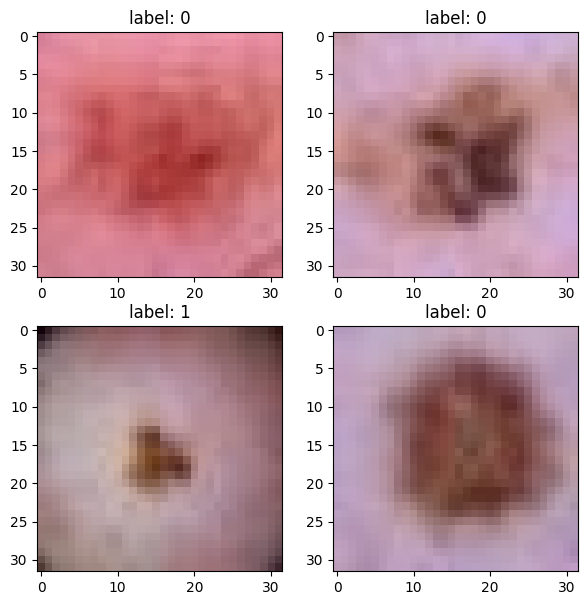

In [6]:
print("Number of labeled images: " + str(len(labeled_data)))
batch_imshow(labeled_batch_sample, labels_for_batch, lambda x: x.item())

In [7]:
augmentation_transformation = transforms.Compose([
    transforms.RandomRotation(100),
    transforms.RandomAdjustSharpness(0.5),
    transforms.RandomCrop(size=(24, 24)),
    transforms.ToTensor(),
    transforms.Normalize(0, 1)
])

In [8]:
augmented_data = MelanomaLabeledDataset("./data/labeled", transform=augmentation_transformation)
augmented_data_loader = DataLoader(augmented_data, batch_size=4, shuffle=False, pin_memory=True)
augmented_batch_sample, _ = next(iter(augmented_data_loader))

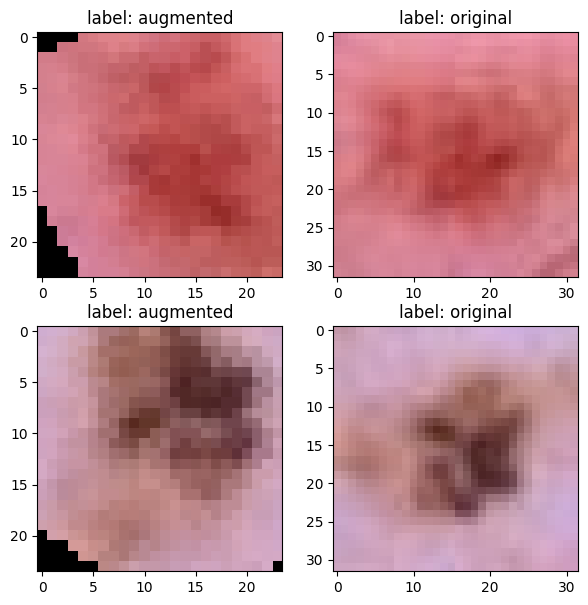

In [9]:
batch_imshow([augmented_batch_sample[0], labeled_batch_sample[0], augmented_batch_sample[1], labeled_batch_sample[1]],
             ["augmented", "original", "augmented", "original"])